<a href="https://colab.research.google.com/github/FuNNNk/Structured-Sentiment-Analysis/blob/main/src/AI/TAIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imports

import re
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import gensim
from sklearn.model_selection import train_test_split
import spacy
import pickle
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint
import itertools
import random
# import nlpaug.augmenter.word as naw
# import nlpaug.augmenter.sentence as nas
# import nlpaug.flow as nafc
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')
sentiment = ['Negative','Positive']
intensity = ['Standard', 'Strong']
combinations = []

for item in itertools.product(sentiment, intensity):
  combinations.append(item[0] + '_' + item[1])
print(combinations)


['Negative_Standard', 'Negative_Strong', 'Positive_Standard', 'Positive_Strong']


In [2]:
import json

def texts_from_dict(data):
    texts_from_file = []
    for dic in data:
        # print(dic)
        texts_from_file.append(dic["text"])
    return texts_from_file

def polarity_from_dict(data):
    annot_from_file = []
    for dic in data:
        # print(dic)
        annot_from_file.append(dic["Polarity"])
    return annot_from_file


with open('/content/drive/MyDrive/data/train5_polar.json', 'r') as f:
        data = json.load(f)
        texts = texts_from_dict(data)
        annotations = polarity_from_dict(data)

print(texts, annotations, sep='\n\n\n\n')


def print_class_lenghts():
  for item in itertools.product(sentiment, intensity):
    print(f"{item[0] + '_' + item[1]}:\n{len([x for x in annotations if x == item[0] + '_' + item[1]])}\n\n")

print_class_lenghts()

['helpful', 'very friendly', 'really good', 'very warm', 'very nicely assorted', 'very small', 'near the airport', 'close to Orly major highways', 'noise of passing large vehicles', 'there is', 'there is', 'free', 'goes from the airport to a hotel', '6 Euro.', 'Best ever !', 'excellent', 'enjoyed', 'enjoyed', 'Fantastic', 'breathtaken', 'Great', 'Great', 'will always remember', 'superb', 'situated in Frankfurt Flughaven railway station', 'efficient', 'quick', 'adequate', 'expensive', 'came quickly', 'hot', 'tasty', 'very expensive', 'Over 40 Euros for a pizza , burger and two drinks', 'only cost 75 Euros', 'One of the cleanest', 'short walk to the shops , restaurants etc.', 'well placed in the City Centre', 'short walk from the station', 'a little rough', 'a little rough', 'one of the cleanest', "didn 't experience", "didn 't experience", 'can ask for the price', 'good', 'clean', 'basic', 'Excellent', 'extremely long walk from the restaurant / reception', 'Very large', 'could not have 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(texts,labels, test_size=0.1, random_state=32)
print (len(X_train),len(X_test),len(y_train),len(y_test))

NameError: ignored

In [ ]:

checkpoint = ModelCheckpoint("/content/drive/MyDrive/data/best_model.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)

Accuracy: 0.776255707762557


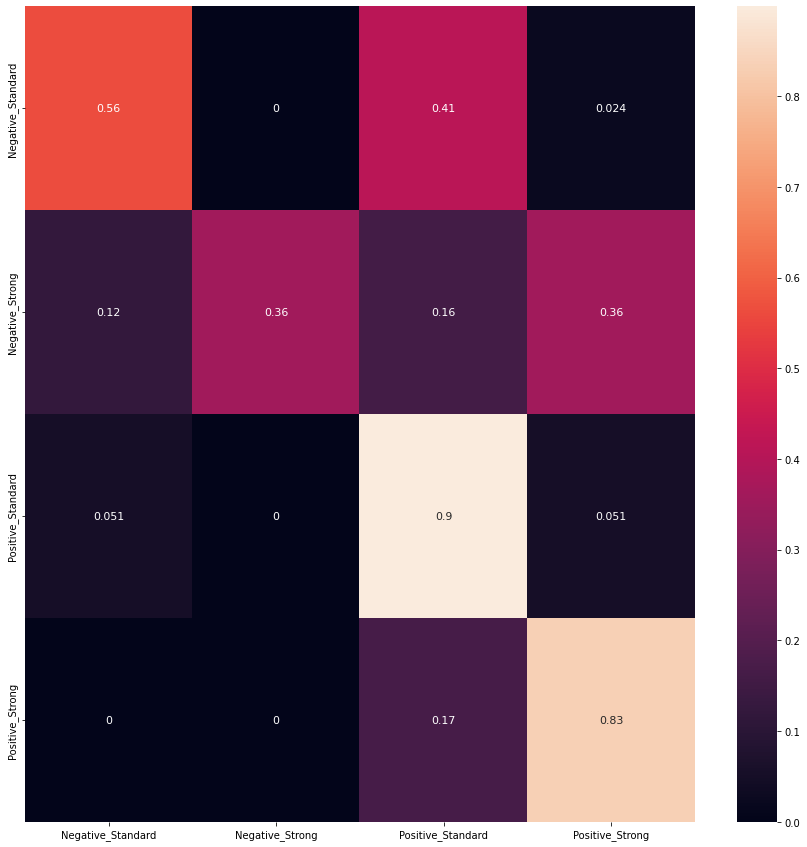

In [ ]:
# logistic regression

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(texts)
# vectorizer.vocabulary_
vectorizer.transform(texts).toarray()


from sklearn.model_selection import train_test_split


sentences_train, sentences_test, y_train, y_test = train_test_split(
    texts, annotations, test_size=0.2, random_state=1000)


from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)


from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
predictions = classifier.predict(X_test)
print("Accuracy:", score)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


cm = metrics.confusion_matrix(y_test, predictions)
conf_matrix = pd.DataFrame(cm, index=combinations, columns = combinations)
#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,15))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 11})

import pickle
# save the classifier
with open('/content/drive/MyDrive/data/regression_model.pkl', 'wb') as fid:
    pickle.dump((vectorizer, classifier), fid)

In [ ]:

sents = ['near center']
print(classifier.predict(vectorizer.transform(sents)))

['Positive_Standard']


In [ ]:

vectorizer, classifer = pickle.load(open('/content/drive/MyDrive/data/regression_model.pkl', 'rb'))

sents = ['near center']
print(classifier.predict(vectorizer.transform(sents)))

['Positive_Standard']


11/11 - 0s - loss: 0.8436 - accuracy: 0.7021 - 271ms/epoch - 25ms/step
Model accuracy:  0.7021276354789734


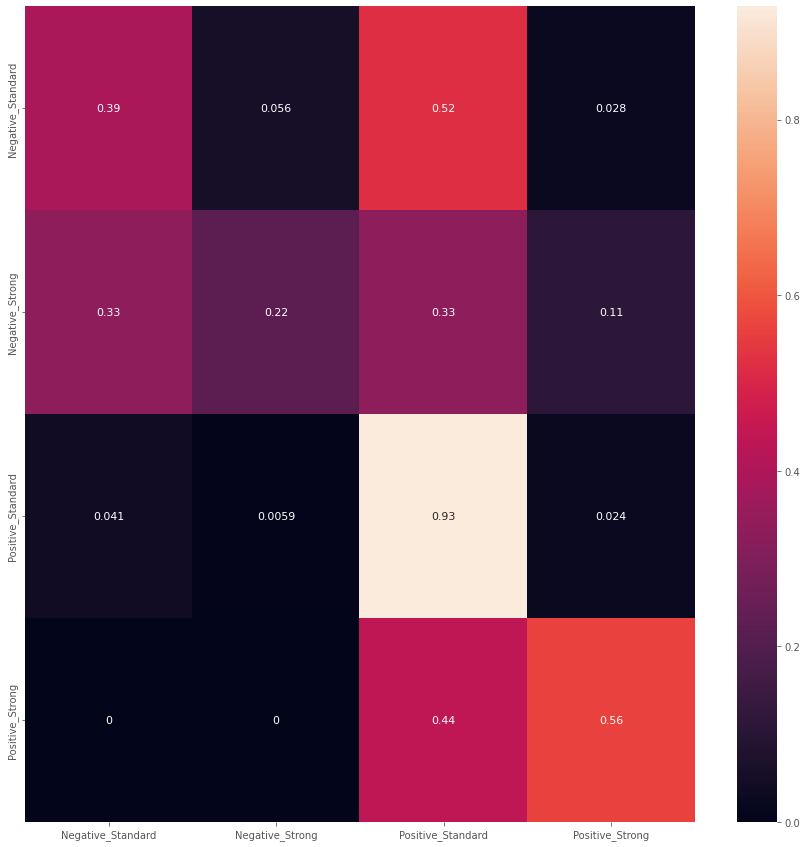

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns


test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('Model accuracy: ',test_acc)
predictions = model.predict(X_test)

matrix = confusion_matrix(Y_test.argmax(axis=1), np.around(predictions, decimals=0).argmax(axis=1))
conf_matrix = pd.DataFrame(matrix, index=combinations, columns = combinations)
#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,15))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 11})

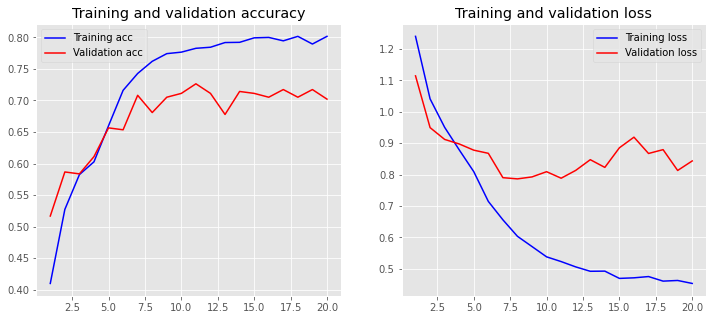

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import cufflinks
from IPython.core.interactiveshell import InteractiveShell


REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
texts2 = [clean_text(text) for text in texts]


# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 1000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 10
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(texts2)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


X = tokenizer.texts_to_sequences(texts2)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X,labels, test_size = 0.10, random_state = 30)

# X_train = np.array(X_train)
# X_test = np.array(X_test)
# Y_train = np.array(Y_train)
# Y_test = np.array(Y_test)

# Y_train = to_categorical(Y_train, len(combinations))
# Y_test = to_categorical(Y_test, len(combinations))

# print(Y_test)

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu'))
model.add(Dense(len(combinations), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'],
              )
print(model.summary())


epochs = 20
batch_size = 32

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test),
                    callbacks = [checkpoint])


accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Found 1407 unique tokens.
Shape of data tensor: (3284, 10)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 100)           100000    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 10, 100)          0         
 lDropout1D)                                                     
                                                                 
 bidirectional_2 (Bidirectio  (None, 10, 200)          160800    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 200)              240800    
 nal)                                                            
        

In [ ]:
import pickle
# save the classifier
with open('/content/drive/MyDrive/data/nn_model.pkl', 'wb') as fid:
    pickle.dump(model, fid)  

INFO:tensorflow:Assets written to: ram://19d57c88-8b71-4a48-a85e-81a001ce79a0/assets
